<a href="https://colab.research.google.com/github/bummmmy/deep_learning_projects/blob/main/number_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

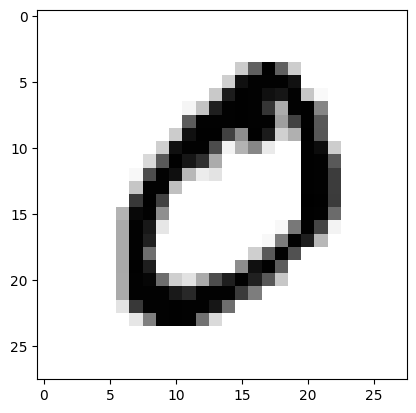

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [2]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print("x_train 배열의 크기:", len(x_train))  # x_train 배열의 크기 출력

2.12.0
11490434/11490434 [==============================] - 0s 0us/step
x_train 배열의 크기: 60000


In [3]:
print(y_train[1])

0


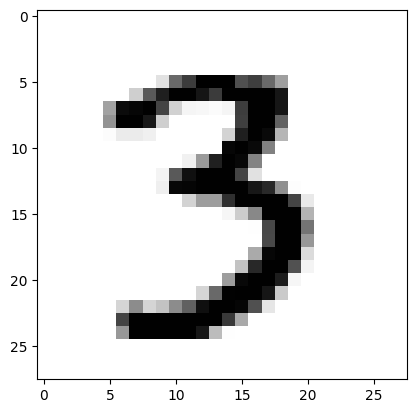

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
# index에 0에서 59999 사이의 숫자를 바꿔가면서 실험해 보세요. 
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
print(x_test.shape)

(10000, 28, 28)


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2118 - accuracy: 0.9362
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0704 - accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0518 - accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0405 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0280 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0240 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0200 - accuracy: 0.9939
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0174 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [14]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 4s - loss: 0.0367 - accuracy: 0.9891 - 4s/epoch - 12ms/step
test_loss: 0.03667055815458298 
test_accuracy: 0.9890999794006348


In [15]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 [==============================] - 4s 12ms/step
model.predict() 결과 :  [4.0046944e-10 2.3942057e-10 1.7198503e-06 1.5046866e-06 1.0429592e-13
 1.0162437e-08 1.2378928e-13 9.9999636e-01 2.4239569e-07 1.3700046e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


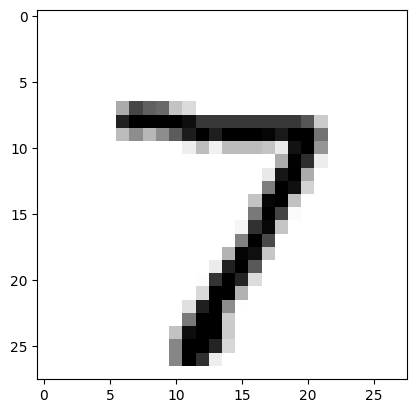

In [16]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [9.6517627e-04 2.0161227e-08 7.9217033e-10 8.2682590e-07 5.7048371e-08
 1.0586441e-03 9.9774122e-01 3.8651048e-11 2.3386320e-04 1.9466725e-07]
라벨: 5, 예측결과: 6


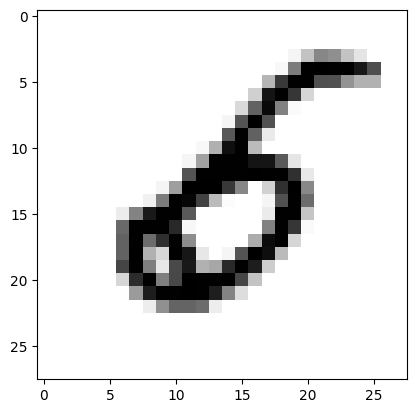

예측확률분포: [9.3397498e-02 8.1914886e-10 1.9219048e-01 2.9276996e-09 3.8812181e-04
 1.0623245e-05 2.2209071e-05 6.3935133e-09 7.1375024e-01 2.4080112e-04]
라벨: 2, 예측결과: 8


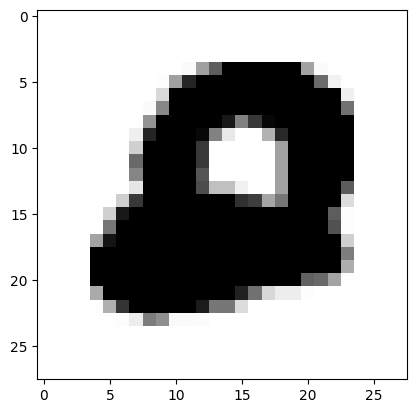

예측확률분포: [9.6517627e-04 2.0161227e-08 7.9217033e-10 8.2682590e-07 5.7048371e-08
 1.0586441e-03 9.9774122e-01 3.8651048e-11 2.3386320e-04 1.9466725e-07]
라벨: 5, 예측결과: 6


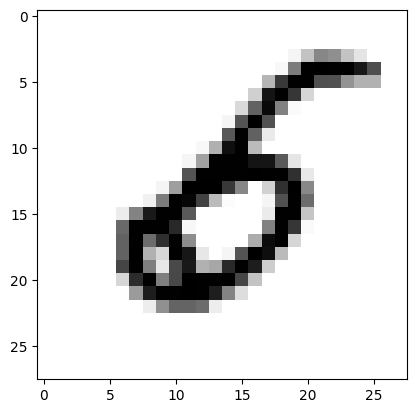

예측확률분포: [3.1307232e-02 1.9398013e-01 5.6360770e-02 1.4154782e-04 4.6660850e-04
 4.2376740e-04 6.9457501e-01 1.3180093e-05 2.2729123e-02 2.6365767e-06]
라벨: 1, 예측결과: 6


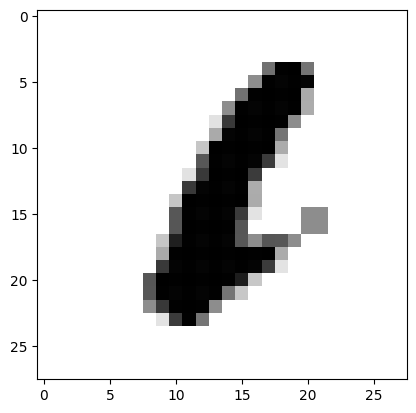

예측확률분포: [9.6517627e-04 2.0161227e-08 7.9217033e-10 8.2682590e-07 5.7048371e-08
 1.0586441e-03 9.9774122e-01 3.8651048e-11 2.3386320e-04 1.9466725e-07]
라벨: 5, 예측결과: 6


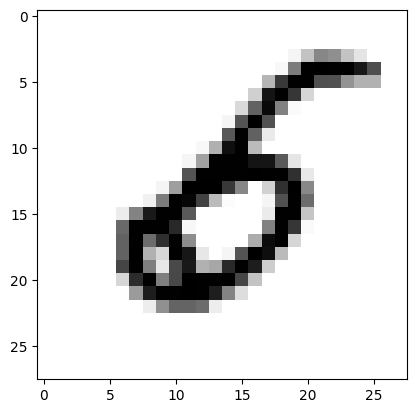

In [17]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()